<a href="https://colab.research.google.com/github/Muskanladwal123/project/blob/main/Credit_Card_Fraud_Detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Fraud Detection**

In [ ]:
#Importing necessary algorithms

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

**Step 1 : Dataset Loading and Analysis**

In [ ]:
# Load Dataset into a dataframeframe using pandas

df = pd.read_csv("/content/creditcard.csv")

In [ ]:
print("Shape of the Dataset: ", df.shape) # number of rows and columns in our dataset
print("\n\n", df.columns) # columns/features in our Dataset

Shape of the Dataset:  (21878, 31)


 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
df.head() # first five records

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail() # last five records

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
21873,31906,1.285161,-0.701455,0.221870,-0.744753,-0.674967,0.034267,-0.631373,0.097860,-0.835749,...,0.083025,0.190059,-0.074942,-0.278466,0.463615,-0.223877,0.011735,0.000997,39.75,0.0
21874,31906,-0.345979,1.094568,1.282208,0.068241,-0.016965,-0.989567,0.693958,-0.050855,-0.333856,...,-0.266852,-0.723026,-0.003364,0.322646,-0.173496,0.073145,0.241997,0.097610,5.99,0.0
21875,31907,1.171852,0.718042,-0.227521,1.373722,0.152349,-0.949840,0.271427,-0.153000,-0.184297,...,-0.013584,0.088759,-0.059148,0.278992,0.589886,-0.319374,0.055064,0.058347,1.00,0.0
21876,31907,1.209330,-1.130242,1.614261,0.000265,-1.974416,0.262320,-1.369554,0.173769,0.639855,...,-0.520157,-0.573057,0.037646,0.488580,0.161446,1.067798,0.025745,0.028549,40.00,0.0
21877,31907,-0.184653,0.376693,0.632988,-2.282365,0.403553,-0.371666,0.695359,-0.064835,0.610986,...,-0.130997,-0.312833,-0.156567,-0.899683,0.093186,-0.130187,0.029255,0.009228,NaN,NaN


In [ ]:
# Print the shape of the dataframe

df = df.sample(frac = 0.3, random_state = 42) # using 30% of our dataset for next steps
print("Shape of the Dataset: ", df.shape)

Shape of the Dataset:  (6563, 31)


In [ ]:
# Determine number of fraud cases in Dataset

Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = (len(Fraud)/float(len(Valid)))
print("Outlier_fraction: {0} %".format(outlier_fraction*100))

print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

Outlier_fraction: 0.38237993270113185 %
Fraud Cases: 25
Valid Transactions: 6538


In [ ]:
# The columns have been encrypted using PCA Dimensionality reduction to protect user identities and sensitive features

print("Description of the Dataset: ", df.describe())

Description of the Dataset:                 Time           V1           V2           V3           V4  \
count   6563.000000  6563.000000  6563.000000  6563.000000  6563.000000   
mean   16887.209203    -0.270754     0.213077     0.735103     0.263831   
std    10957.951031     1.916066     1.587657     1.714361     1.439834   
min        0.000000   -28.524268   -34.607649   -29.468732    -4.826127   
25%     5611.000000    -0.959553    -0.348515     0.292375    -0.641101   
50%    18628.000000    -0.302521     0.215068     0.889127     0.228923   
75%    27718.000000     1.163354     0.868694     1.518408     1.132789   
max    31907.000000     1.622188    15.876923     4.079168    11.805469   

                V5           V6           V7           V8           V9  ...  \
count  6563.000000  6563.000000  6563.000000  6563.000000  6563.000000  ...   
mean     -0.166294     0.098093    -0.145534     0.007645     0.563923  ...   
std       1.514104     1.384855     1.399410     1.468260 

**Step 2 : Data Visualization**

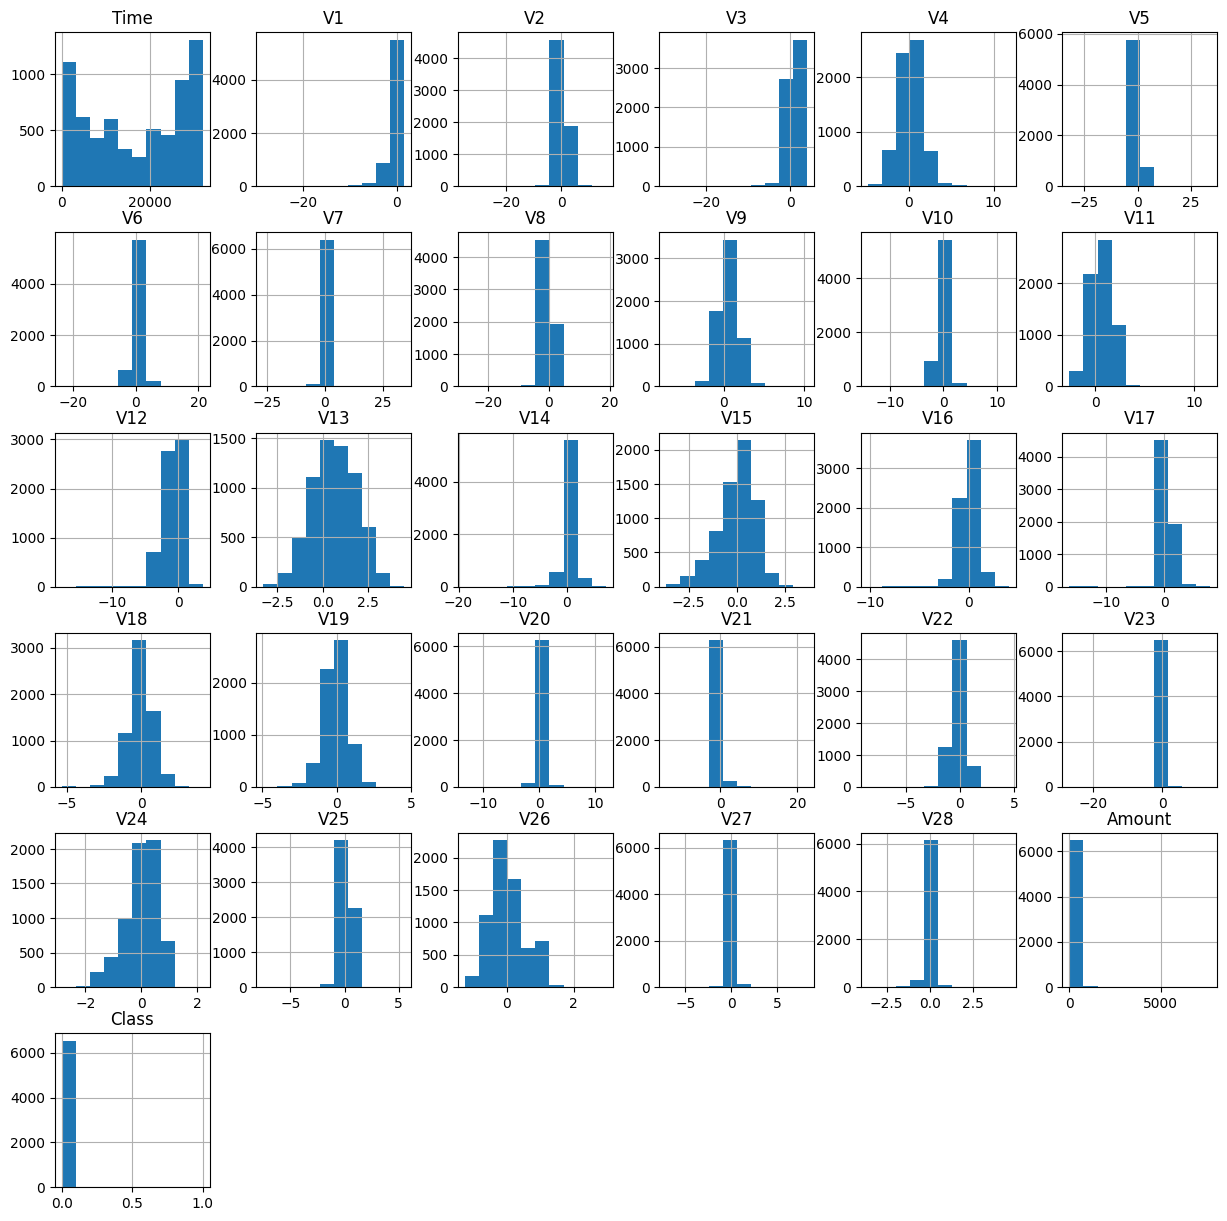

In [ ]:
# Plot histograms for each parameter

df.hist(figsize = (15, 15))
plt.show()

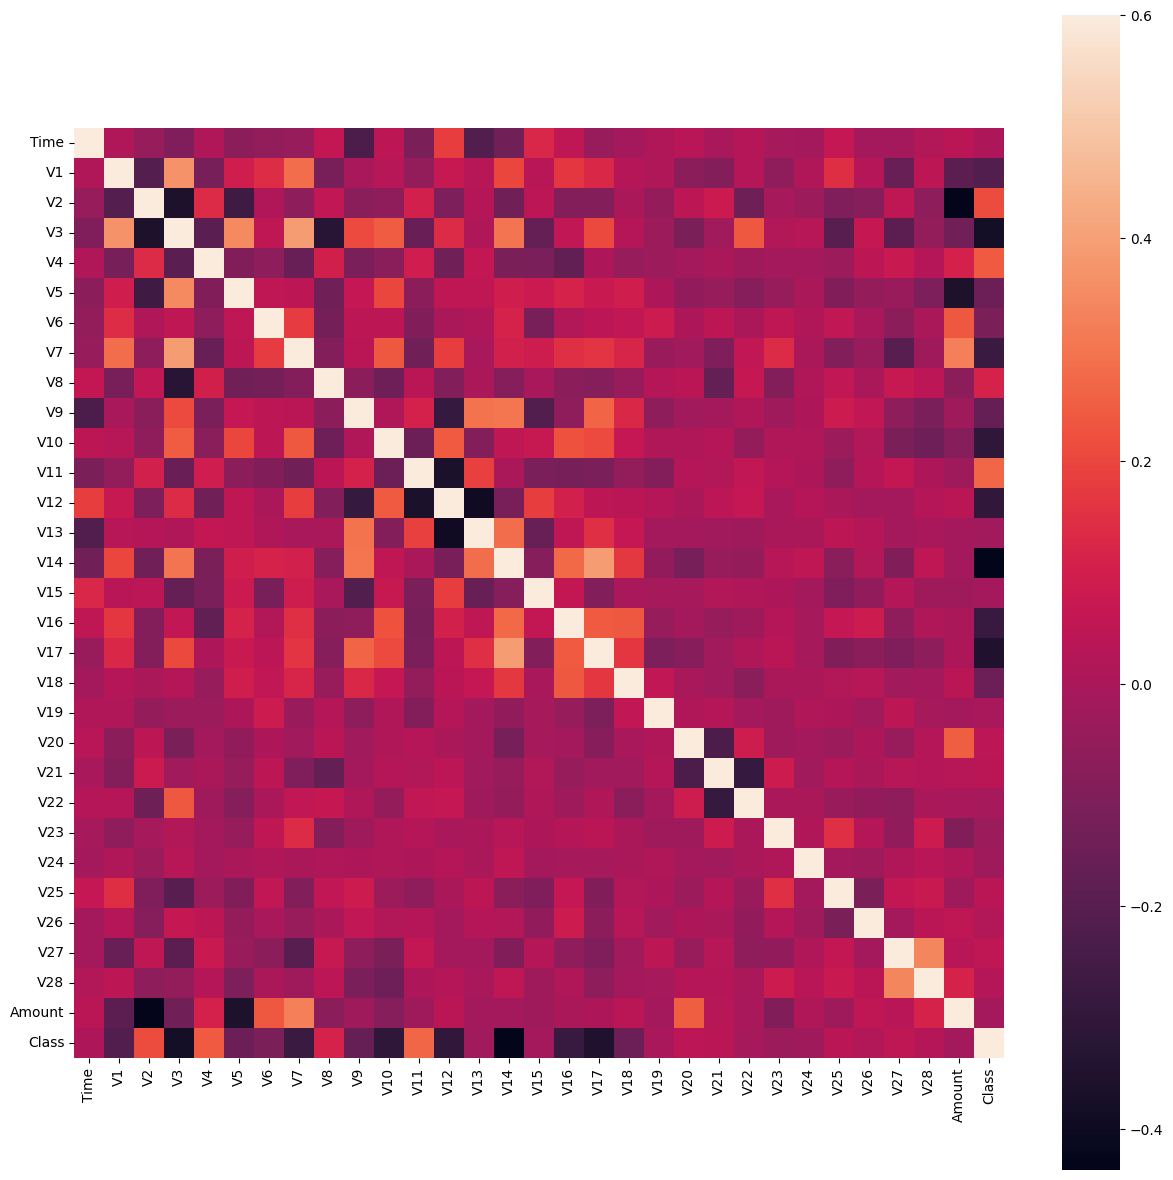

In [ ]:
# Correlation matrix

corrmat = df.corr()
fig = plt.figure(figsize = (15, 15))

#Plotting a heatmap to visualize the correlation matrix and see features
# with strong correlation to the target class
sns.heatmap(corrmat, vmax = .6, square = True) # vmax is the max and min value you want to have for the scale
plt.show()

In [ ]:
corrmat['Class']

Time      0.007931
V1       -0.215475
V2        0.211929
V3       -0.382233
V4        0.239727
V5       -0.149321
V6       -0.111305
V7       -0.277267
V8        0.112829
V9       -0.161224
V10      -0.308815
V11       0.267353
V12      -0.300549
V13      -0.022901
V14      -0.436499
V15      -0.011487
V16      -0.279255
V17      -0.350257
V18      -0.150148
V19      -0.004800
V20       0.044299
V21       0.038084
V22      -0.007799
V23      -0.031737
V24      -0.024877
V25       0.040892
V26       0.020769
V27       0.051833
V28       0.028190
Amount   -0.011581
Class     1.000000
Name: Class, dtype: float64

In [ ]:
len(corrmat['Class'])

31

**Step 3 : Feature Selection**


In [ ]:
# getting columns which have correlation score > 0.01 or < -0.01, you can chose a different constant and experiment

cols = corrmat.keys()
cols_to_keep = []

for i in range(len(corrmat)):

    if abs(corrmat['Class'][i]) > 0.01:

        cols_to_keep.append(cols[i])

In [ ]:
len(cols_to_keep) # the final features list we wish to keep

28

In [ ]:
cols_to_keep

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V20',
 'V21',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [ ]:
# removing the 'Class' columnn from the features list, as it is the variable we wish to predict

cols = cols_to_keep[:-1]
features = df[cols] # records of all transactions, excluding the target class
target = df["Class"] # records of the corresponding label for each record

print(features.shape)
print(target.shape)

(6563, 27)
(6563,)


**Step 4 : Model Training and Selection**

In [ ]:
# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "IF": IsolationForest(max_samples = len(features),
                                        contamination = outlier_fraction,
                                        random_state = state),
    "LOF": LocalOutlierFactor(
        n_neighbors = 20,
        contamination = outlier_fraction)}

In [ ]:
# skipping the train, test split step because we wish the model to overfit on these features and learn
# a mathematical function to map the features

n_outliers = len(Fraud)

# Fit the model
for i, (clf_name, clf) in enumerate(classifiers.items()):

    # fit the dataframe and tag outliers
    if clf_name == "LOF":

        y_pred = clf.fit_predict(features)
        scores_pred = clf.negative_outlier_factor_

    else:

        # train/fit classifier on our features
        clf.fit(features)
        # generate predictions
        scores_pred = clf.decision_function(features)
        y_pred = clf.predict(features)

    # Reshape the prediction values to 0 for valid, 1 for fraud.

    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != target).sum()

    # Run classification metrics
    print('Classifier {0}: \nNumber of Errors: {1}'.format(clf_name, n_errors))
    print('Accuracy: {0}%\n'.format(accuracy_score(target, y_pred)*100))
    print(classification_report(target, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Classifier IF: 
Number of Errors: 33
Accuracy: 99.49718116714918%

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6538
         1.0       0.35      0.36      0.35        25

    accuracy                           0.99      6563
   macro avg       0.67      0.68      0.68      6563
weighted avg       1.00      0.99      1.00      6563

Classifier LOF: 
Number of Errors: 41
Accuracy: 99.37528569251867%

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6538
         1.0       0.19      0.20      0.20        25

    accuracy                           0.99      6563
   macro avg       0.59      0.60      0.60      6563
weighted avg       0.99      0.99      0.99      6563

